<a href="https://colab.research.google.com/github/son50git/PKT_003_Mastering-Matplotlib-3/blob/master/PKT_003_Rework_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [26]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
sns.set(style="whitegrid")

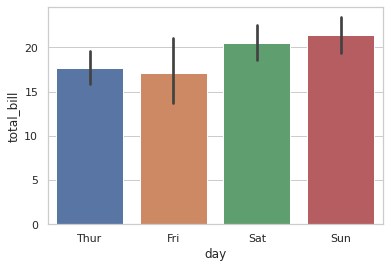

In [28]:
# A barplot is basically used to aggregate the categorical data according to some methods 
# and by default it's the mean
ax = sns.barplot(x="day", y="total_bill", data=tips)   

In [29]:
aggr_col = tips.groupby(["day"])["total_bill"].sum()
print(aggr_col.head(10))
# type(aggr_col) # Series
aggr_data = pd.DataFrame({"total_bill":aggr_col})
aggr_data

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64


,total_bill
day,
Thur,1096.33
Fri,325.88
Sat,1778.40
Sun,1627.16


In [30]:
aggr_data.reset_index(inplace=True)
print(aggr_data.columns)
aggr_data = aggr_data.rename(columns = {'index':'day'})
print(aggr_data.columns)
print(aggr_data)

Index(['day', 'total_bill'], dtype='object')
Index(['day', 'total_bill'], dtype='object')
    day  total_bill
0  Thur     1096.33
1   Fri      325.88
2   Sat     1778.40
3   Sun     1627.16


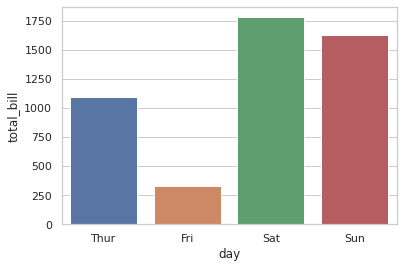

In [31]:
ax = sns.barplot(x="day", y="total_bill", data=aggr_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


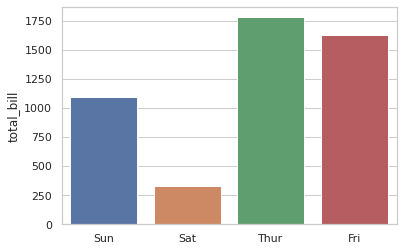

In [41]:
ax = sns.barplot(tips.day.unique(), tips.groupby(['day'])['total_bill'].sum())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


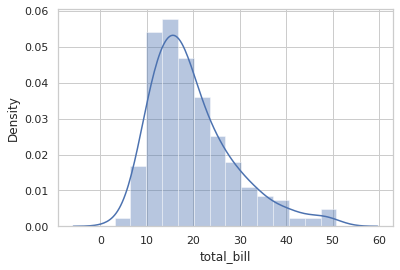

In [32]:
ax = sns.distplot(tips.total_bill)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


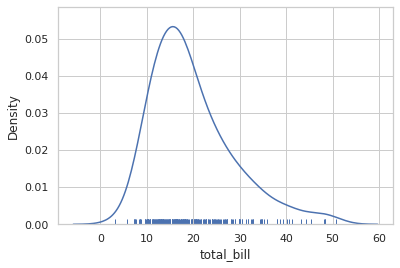

In [33]:
ax = sns.distplot(tips.total_bill, rug=True, hist=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


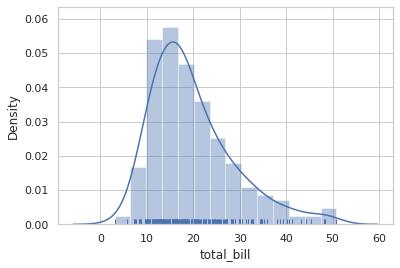

In [34]:
ax = sns.distplot(tips.total_bill, rug=True, hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


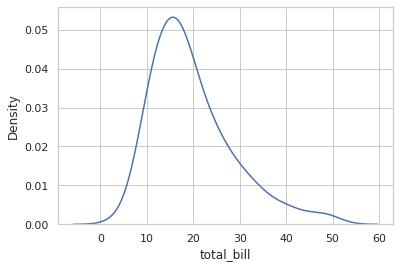

In [35]:
ax = sns.distplot(tips.total_bill, rug=False, hist=False)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

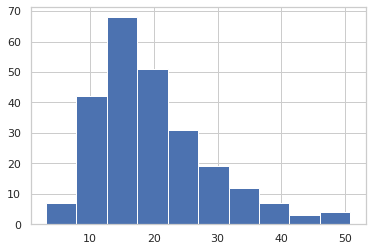

In [36]:
plt.hist(tips.total_bill)

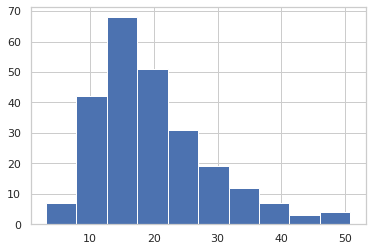

In [58]:
tips.total_bill.hist()

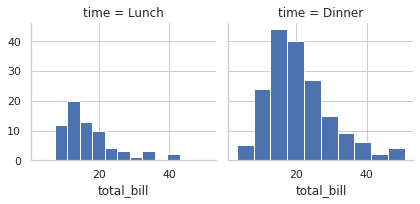

In [60]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "total_bill");

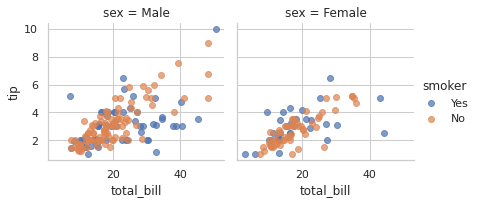

In [61]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

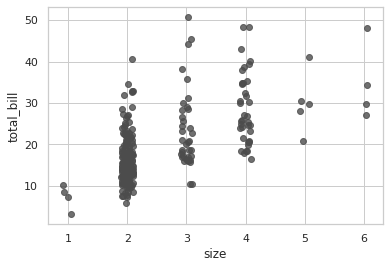

In [70]:
ax = sns.regplot(x="size", y="total_bill", color=".3", fit_reg=False, x_jitter=.1, data=tips)

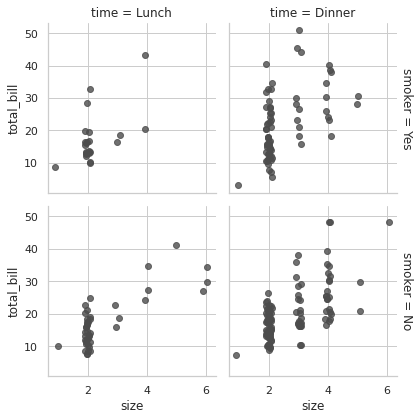

In [71]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

In [39]:
from google.colab import drive, files
drive.mount("/content/drive")

Mounted at /content/drive


In [42]:
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [44]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [49]:
print(vgsales.Genre.unique())
print(vgsales.Platform.unique())


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


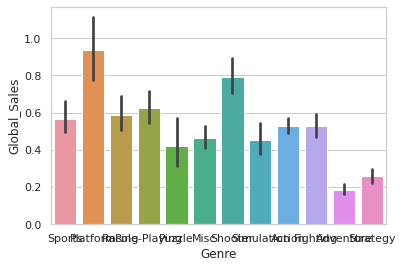

In [50]:
sns.barplot(x='Genre',y='Global_Sales',data=vgsales);

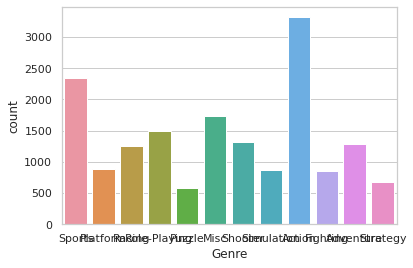

In [52]:
sns.countplot(x='Genre',data=vgsales);

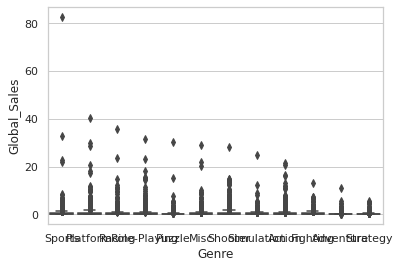

In [54]:
sns.boxplot(x='Genre',y='Global_Sales',data=vgsales);

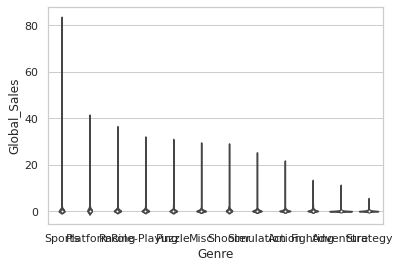

In [55]:
sns.violinplot(x='Genre',y='Global_Sales',data=vgsales);

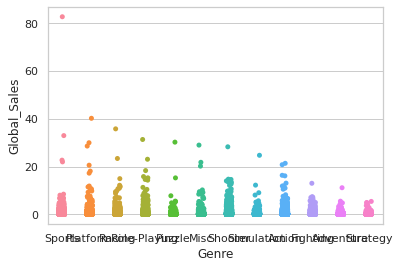

In [56]:
sns.stripplot(x='Genre',y='Global_Sales',data=vgsales);

In [72]:
sns.set()

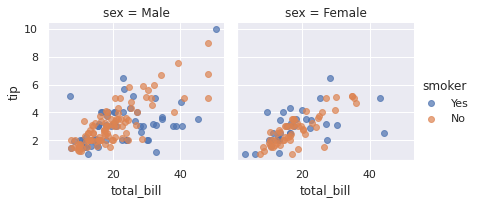

In [73]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

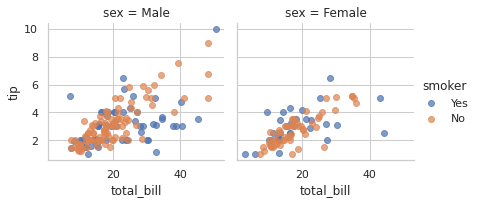

In [74]:
sns.set_style("whitegrid")
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

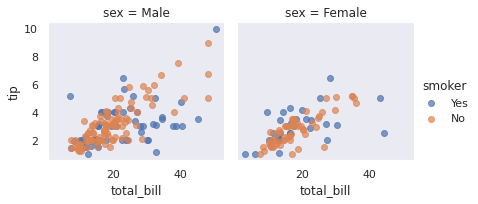

In [75]:
sns.set_style("dark")
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

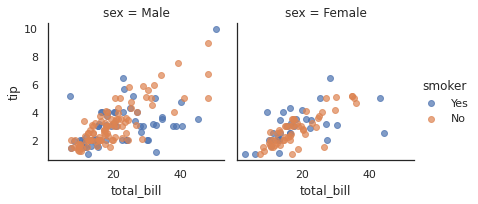

In [76]:
sns.set_style("white")
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

In [77]:
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


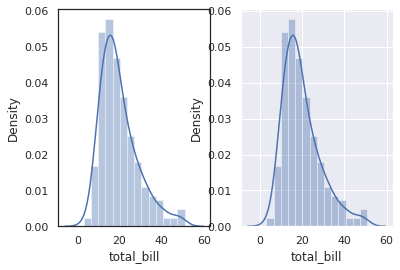

In [78]:
f = plt.figure()
with sns.axes_style("white"):
    ax = f.add_subplot(1, 2, 1)
    ax = sns.distplot(tips.total_bill)
ax = f.add_subplot(1, 2, 2)
ax = sns.distplot(tips.total_bill)